In [2]:
import pandas as pd

file_path = "/disk_4/uddeshya/Test-merge/merged_test_unique_sample.csv"
test_data = pd.read_csv(file_path, usecols=['cleaned_address', 'pincode', 'state']).drop_duplicates(subset='cleaned_address')
test_data['pincode'] = test_data['pincode'].astype(int).astype(str)
unique_states = test_data['state'].unique()
unique_state_count = len(unique_states)

In [3]:
len(test_data['cleaned_address'].unique())

11118467

In [4]:
len(test_data)

11118467

In [5]:
len(test_data)

11118467

In [6]:
unique_states, unique_state_count

(array(['Andaman & Nicobar Islands', 'Andaman and Nicobar Islands',
        'Gujarat', ..., '496001', 'Chhatishgarh', 'Raigarh'], dtype=object),
 1673)

Merged Data Sample with NaN values:
13800
Unmatched Pincodes:
['131028' '131029' '190005' '190014' '190015' '190019' '190021' '191101'
 '192101' '193201' nan '250623' '508201' '508218' '670676' '670679'
 '670692' '670693' '670694' '744101' '744102' '744103' '744112' '823002'
 '823003' '824209' '422113' '364140' '364230' '364250' '364275' '364505'
 '380055' '394150' '394180' '394185' '394305' '394310' '394325' '394326'
 '394327' '421601' '421604' '422103' '422112' '505101' '505122' '505476'
 '505490' '531149' '250606']


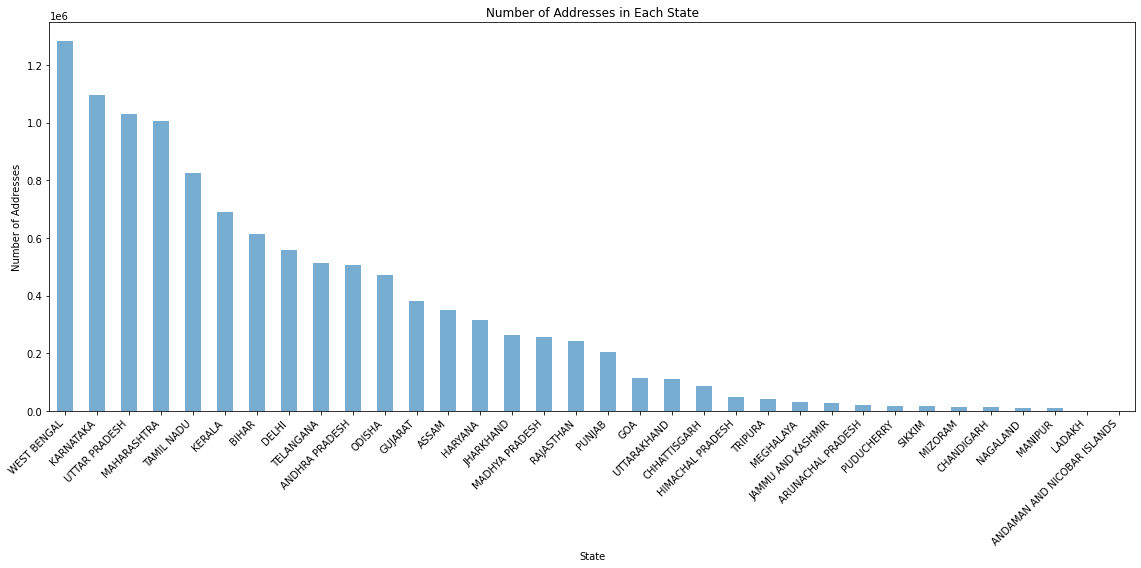

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/disk_4/uddeshya/Test-merge/merged_test_unique_sample.csv"
test_data = pd.read_csv(file_path, usecols=['cleaned_address', 'pincode', 'state'])
test_data['pincode'] = test_data['pincode'].astype('Int64').astype(str)
test_data.head()

pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')
df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

merged_data = test_data.merge(df_mapping, left_on='pincode', right_on='Pincode', how='right')

print("Merged Data Sample with NaN values:")
print(len(merged_data[merged_data['State'].isna()]))

unmatched_pincodes = merged_data[merged_data['State'].isna()]['pincode'].unique()
print("Unmatched Pincodes:")
print(unmatched_pincodes)

matched_data = merged_data.dropna(subset=['State'])

state_counts = matched_data['State'].value_counts()
plt.figure(figsize=(16, 8))
state_counts.plot(kind='bar', color='tab:blue', alpha=0.6)
plt.xlabel('State')
plt.ylabel('Number of Addresses')
plt.title('Number of Addresses in Each State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [8]:
len(matched_data)

11164755

In [9]:
def get_state_address_counts(matched_data):
    """
    Returns a dictionary with state names as keys and the number of addresses that belong to each state as values.
    
    Args:
    matched_data (pd.DataFrame): The merged data containing the 'State' column.

    Returns:
    dict: A dictionary with state names as keys and the number of addresses as values.
    """
    state_counts = matched_data['State'].value_counts().to_dict()
    return state_counts

In [10]:
state_address_counts = get_state_address_counts(matched_data)
print(state_address_counts)

print(sum((state_address_counts.values())))

{'WEST BENGAL': 1283753, 'KARNATAKA': 1097712, 'UTTAR PRADESH': 1029787, 'MAHARASHTRA': 1004363, 'TAMIL NADU': 825070, 'KERALA': 689393, 'BIHAR': 614329, 'DELHI': 557111, 'TELANGANA': 513217, 'ANDHRA PRADESH': 506781, 'ODISHA': 471766, 'GUJARAT': 381357, 'ASSAM': 351526, 'HARYANA': 313913, 'JHARKHAND': 262614, 'MADHYA PRADESH': 256353, 'RAJASTHAN': 242676, 'PUNJAB': 204924, 'GOA': 113656, 'UTTARAKHAND': 111578, 'CHHATTISGARH': 85931, 'HIMACHAL PRADESH': 48172, 'TRIPURA': 42552, 'MEGHALAYA': 29745, 'JAMMU AND KASHMIR': 28180, 'ARUNACHAL PRADESH': 19939, 'PUDUCHERRY': 16510, 'SIKKIM': 16231, 'MIZORAM': 14100, 'CHANDIGARH': 13248, 'NAGALAND': 9584, 'MANIPUR': 8680, 'LADAKH': 3, 'ANDAMAN AND NICOBAR ISLANDS': 1}
11164755


In [45]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_state_heatmap(matched_data, shapefile_path):
    """
    Plots a heat map on the India map showing the number of addresses per state.
    
    Args:
    matched_data (pd.DataFrame): The merged data containing the 'State' column.
    shapefile_path (str): The path to the shapefile for India.
    """
    state_address_counts = matched_data['State'].value_counts().to_dict()
    state_counts_df = pd.DataFrame(list(state_address_counts.items()), columns=['State', 'Address_Count'])
    gdf_india = gpd.read_file(shapefile_path)
    gdf_india['State_Name'] = gdf_india['State_Name'].str.upper()
    state_counts_df['State'] = state_counts_df['State'].str.upper()
    

    state_counts_df = state_counts_df.replace({'State': {'TAMIL NADU': 'TAMILNADU', 'CHHATTISGARH': 'CHHATTISHGARH', 'TELANGANA': 'TELENGANA'}})
    

    gdf_merged = gdf_india.set_index('State_Name').join(state_counts_df.set_index('State'), how='left')
    
    gdf_merged['Address_Count'] = gdf_merged['Address_Count'].fillna(0)
    
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    gdf_merged.plot(column='Address_Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title('State-wise Address Count Heat Map', fontdict={'fontsize': '15', 'fontweight' : '3'})
    ax.axis('off')
    plt.show()

shapefile_path = "/home/uddeshya.singh/Experiments/India-shape" 

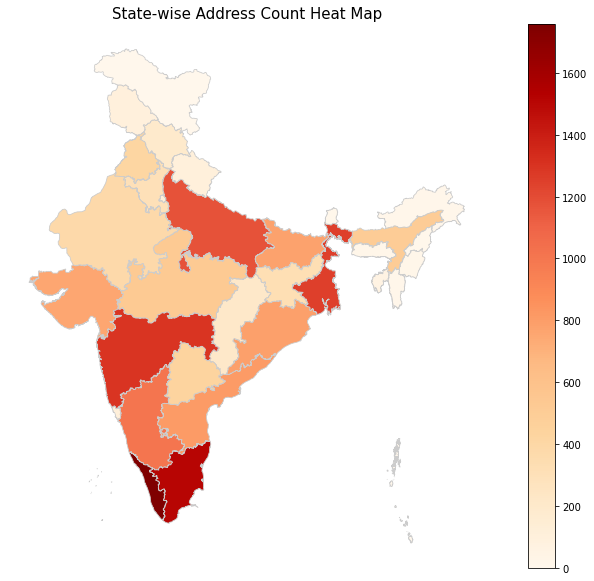

In [46]:

plot_state_heatmap(matched_data, shapefile_path)

In [13]:
11176756 - 11164755

12001

In [14]:
11164755 - 11118467

46288

In [17]:
import pickle
import os
import numpy as np
import copy
import pandas as pd
from tqdm import tqdm
import math
import matplotlib.pyplot as plt
import json

In [18]:
def get_acc_dicts_for_state(state_acc_dir_local):
    
    dh_pin_wise_acc_dict_local = {}
    pin_wise_acc_dict_local = {}
    for file in os.listdir(state_acc_dir_local):
        if file.endswith('.pickle'):
            dh_name = file.replace('acc_dh_', '').replace('.pickle', '')
            
            acc_file_path_local = os.path.join(state_acc_dir_local, file)
            acc_dict_local = load_acc(acc_file_path_local)
                
            dh_pin_wise_acc_dict_local[dh_name] = acc_dict_local
            
            for pin, pin_acc in dh_pin_wise_acc_dict_local[dh_name].items():
                pin_wise_acc_dict_local[pin] = pin_acc
            
    print('len of dh_wise_acc {} and len of pin_wise_acc {} '.format(len(dh_pin_wise_acc_dict_local), len(pin_wise_acc_dict_local)))
    return dh_pin_wise_acc_dict_local, pin_wise_acc_dict_local

In [19]:
def load_acc_dict_deb_9(acc_file_path_local):
    with open(acc_file_path_local, 'rb') as fp:
        acc_dict = pickle.load(fp)

        
    acc_dict_int = {}
    
    for k,v in acc_dict.items():
        acc_dict_int[int(k)] = v
    
    return acc_dict_int

pin_start_dig_list = ['1', '2', '3', '4', '5', '6', '7', '8']

phase_1_group_wise_acc_dict= {}
for pin_start_dig in pin_start_dig_list:
    acc_path = '/disk_4/grid_v21/data/dicts/misc/acc_grid_v2/test_acc_dict_grp_'+pin_start_dig+'.json'
    
    acc_dict = load_acc_dict_deb_9(acc_path)
    
    phase_1_group_wise_acc_dict[pin_start_dig] = acc_dict


phase_1_pin_wise_acc_dict_loaded = {}
for k,v in phase_1_group_wise_acc_dict.items():
    phase_1_pin_wise_acc_dict_loaded.update(v)

print(len(phase_1_pin_wise_acc_dict_loaded))

phase_1_pin_wise_acc_dict = {}

for k,v in phase_1_pin_wise_acc_dict_loaded.items():
    phase_1_pin_wise_acc_dict[str(k)] = v

2144


In [20]:
def load_acc(acc_path_local):
    with open(acc_path_local, 'rb') as fp:
        acc_dict_local = pickle.load(fp)
    return acc_dict_local


def get_acc_dicts_for_state(state_acc_dir_local):
    
    dh_pin_wise_acc_dict_local = {}
    pin_wise_acc_dict_local = {}
    for file in os.listdir(state_acc_dir_local):
        if file.endswith('.pickle'):
            dh_name = file.replace('acc_dh_', '').replace('.pickle', '')
            
            acc_file_path_local = os.path.join(state_acc_dir_local, file)
            acc_dict_local = load_acc(acc_file_path_local)
                
            dh_pin_wise_acc_dict_local[dh_name] = acc_dict_local
            
            for pin, pin_acc in dh_pin_wise_acc_dict_local[dh_name].items():
                pin_wise_acc_dict_local[pin] = pin_acc
            
    print('len of dh_wise_acc {} and len of pin_wise_acc {} '.format(len(dh_pin_wise_acc_dict_local), len(pin_wise_acc_dict_local)))
    return dh_pin_wise_acc_dict_local, pin_wise_acc_dict_local


    
def get_all_pin_acc_dict(state_wise_pin_acc_dict_local):
    all_pin_wise_acc_dict_local = {}
    
    for state in state_wise_pin_acc_dict_local:
        for pin, pin_acc in state_wise_pin_acc_dict_local[state].items():
            all_pin_wise_acc_dict_local[pin] = pin_acc
            
            
    all_pin_wise_acc_dict_local_2 = {}
    for k,v in all_pin_wise_acc_dict_local.items():
        all_pin_wise_acc_dict_local_2[str(k)] = v
    
    
    print('len of all_pin_wise_acc_dict_local ', len(all_pin_wise_acc_dict_local_2))
    return all_pin_wise_acc_dict_local_2


state_to_do_list = ['PUDUCHERRY', 'JHARKHAND', 'SIKKIM', 'TRIPURA', 'HIMACHAL_PRADESH', 'MADHYA_PRADESH', 'ODISHA', 
                    'WEST_BENGAL', 'TAMIL_NADU', 'JAMMU_AND_KASHMIR', 'UTTARAKHAND', 'CHHATTISGARH', 'HARYANA', 
                    'ARUNACHAL_PRADESH', 'MEGHALAYA', 'PUNJAB', 'NAGALAND', 'MIZORAM', 'MAHARASHTRA', 'KARNATAKA',
                    'KERALA', 'CHANDIGARH', 'GUJARAT', 'RAJASTHAN', 'GOA', 'ASSAM', 'ANDHRA_PRADESH', 'BIHAR', 
                    'UTTAR_PRADESH', 'TELANGANA', 'MANIPUR']
state_wise_pin_acc_dict = {}
for state_to_do in state_to_do_list:
    state_acc_dir = '/disk_4/grid_v21/data/dicts/misc/dh_acc_dicts/dh_acc_dicts_L1/state_grp_'+state_to_do+'/'

    print('\n state ', state_to_do)
    dh_pin_wise_acc_dict, pin_wise_acc_dict = get_acc_dicts_for_state(state_acc_dir)
    
    state_wise_pin_acc_dict[state_to_do] = pin_wise_acc_dict
    
    
    
phase_II_pin_wise_acc_dict = get_all_pin_acc_dict(state_wise_pin_acc_dict)


 state  PUDUCHERRY
len of dh_wise_acc 2 and len of pin_wise_acc 22 

 state  JHARKHAND
len of dh_wise_acc 45 and len of pin_wise_acc 193 

 state  SIKKIM
len of dh_wise_acc 6 and len of pin_wise_acc 8 

 state  TRIPURA
len of dh_wise_acc 18 and len of pin_wise_acc 48 

 state  HIMACHAL_PRADESH
len of dh_wise_acc 11 and len of pin_wise_acc 68 

 state  MADHYA_PRADESH
len of dh_wise_acc 53 and len of pin_wise_acc 189 

 state  ODISHA
len of dh_wise_acc 77 and len of pin_wise_acc 393 

 state  WEST_BENGAL
len of dh_wise_acc 161 and len of pin_wise_acc 877 

 state  TAMIL_NADU
len of dh_wise_acc 109 and len of pin_wise_acc 1009 

 state  JAMMU_AND_KASHMIR
len of dh_wise_acc 6 and len of pin_wise_acc 33 

 state  UTTARAKHAND
len of dh_wise_acc 14 and len of pin_wise_acc 47 

 state  CHHATTISGARH
len of dh_wise_acc 22 and len of pin_wise_acc 106 

 state  HARYANA
len of dh_wise_acc 37 and len of pin_wise_acc 185 

 state  ARUNACHAL_PRADESH
len of dh_wise_acc 6 and len of pin_wise_acc 7 

 s

In [21]:
better_btw_p_I_II = {}
all_pin_p1_vs_p2 = {}

for k,v in phase_1_pin_wise_acc_dict.items():
    if k in phase_II_pin_wise_acc_dict:
        p_I_acc = v['per'][500]
        p_II_acc = phase_II_pin_wise_acc_dict[k]['per'][500]
        
        
        if p_II_acc > p_I_acc + 0.01:
            better_btw_p_I_II[k] = "p2"
            all_pin_p1_vs_p2[k]  = "p2"
#             print(p_II_acc, p_I_acc)
        else:
            better_btw_p_I_II[k] = "p1"
            all_pin_p1_vs_p2[k]  = "p1"
            
            
            
    else:
        all_pin_p1_vs_p2[k]  = "p1"
        
for k,v in phase_II_pin_wise_acc_dict.items():
    if k not in all_pin_p1_vs_p2:
        all_pin_p1_vs_p2[k]  = "p2"
        
            
print('len(better_btw_p_I_II, len(all_pin_p1_vs_p2)) ', len(better_btw_p_I_II), len(all_pin_p1_vs_p2))

## merge p I & p II dicts
updated_phase_I_II_pin_wise_acc_dict = {}
only_phase_2_additional_pin_wise_acc_dict = {}
only_phase_1_additional_pin_wise_acc_dict = {}

for pin in all_pin_p1_vs_p2:
    if all_pin_p1_vs_p2[pin] == 'p1':
        updated_phase_I_II_pin_wise_acc_dict[pin] = phase_1_pin_wise_acc_dict[pin]
    else:
        updated_phase_I_II_pin_wise_acc_dict[pin] = phase_II_pin_wise_acc_dict[pin]
        
            
for pin in phase_II_pin_wise_acc_dict:
    if all_pin_p1_vs_p2[pin] == 'p2':
        only_phase_2_additional_pin_wise_acc_dict[pin] = phase_II_pin_wise_acc_dict[pin]

        
for pin in phase_1_pin_wise_acc_dict:
    if all_pin_p1_vs_p2[pin] == 'p1':
        only_phase_1_additional_pin_wise_acc_dict[pin] = phase_1_pin_wise_acc_dict[pin]
  
        
print(len(updated_phase_I_II_pin_wise_acc_dict), len(only_phase_2_additional_pin_wise_acc_dict), len(only_phase_1_additional_pin_wise_acc_dict))

len(better_btw_p_I_II, len(all_pin_p1_vs_p2))  279 10684
10684 8600 2084


In [27]:
def calculate_total_deliveries(acc_dict):
    total_deliveries = {}
    for pincode, data in acc_dict.items():
        num_2000 = data['num'].get(2000, 0)
        num_rest = data['num'].get('rest', 0)
        num_none = data['num'].get("None" , 0)
        total_deliveries[pincode] = num_2000 + num_rest
    return total_deliveries

# Calculate total deliveries
total_deliveries = calculate_total_deliveries(updated_phase_I_II_pin_wise_acc_dict)


In [26]:
updated_phase_I_II_pin_wise_acc_dict

{'122018': {'num': {100: 4399,
   200: 5183,
   500: 5841,
   1000: 5983,
   2000: 6021,
   'rest': 84,
   'None': 0},
  'per': {100: 0.7205569205569206,
   200: 0.848976248976249,
   500: 0.9567567567567568,
   1000: 0.98001638001638,
   2000: 0.9862407862407863,
   'rest': 0.013759213759213759,
   'None': 0.0}},
 '123413': {'num': {100: 37,
   200: 46,
   500: 48,
   1000: 48,
   2000: 50,
   'rest': 0,
   'None': 0},
  'per': {100: 0.74,
   200: 0.92,
   500: 0.96,
   1000: 0.96,
   2000: 1.0,
   'rest': 0.0,
   'None': 0.0}},
 '122016': {'num': {100: 2844,
   200: 3069,
   500: 3253,
   1000: 3307,
   2000: 3329,
   'rest': 71,
   'None': 0},
  'per': {100: 0.8364705882352941,
   200: 0.9026470588235294,
   500: 0.956764705882353,
   1000: 0.9726470588235294,
   2000: 0.9791176470588235,
   'rest': 0.02088235294117647,
   'None': 0.0}},
 '122413': {'num': {100: 1700,
   200: 2013,
   500: 2321,
   1000: 2421,
   2000: 2470,
   'rest': 61,
   'None': 0},
  'per': {100: 0.67167127617

In [28]:
sum(total_deliveries.values())

10569042

In [29]:
total_deliveries.keys()

dict_keys(['122018', '123413', '122016', '122413', '110047', '110078', '110018', '121007', '121013', '110058', '122009', '110034', '122504', '110020', '110028', '110059', '122012', '122002', '122010', '110076', '110021', '122001', '122506', '110023', '122105', '110067', '121001', '110072', '110062', '122008', '110060', '110090', '110037', '110050', '110017', '110093', '110029', '121010', '110035', '122101', '110064', '110051', '110005', '121009', '110026', '121003', '110027', '110043', '122051', '110012', '110009', '110041', '122052', '110065', '121105', '121101', '110049', '110085', '110096', '110092', '110046', '110025', '110031', '110008', '110083', '122004', '110040', '110015', '122414', '110094', '110074', '110030', '110071', '110086', '110045', '110036', '110004', '110019', '110039', '122013', '110011', '110091', '121008', '110081', '121004', '110032', '110038', '122014', '110095', '122050', '110073', '122017', '122015', '110075', '110002', '110084', '110088', '110089', '110063',

In [30]:
df_total_deliveries = pd.DataFrame(list(total_deliveries.items()), columns=['Pincode', 'Total_Deliveries'])
df_total_deliveries['Pincode'] = df_total_deliveries['Pincode'].astype(str)

In [31]:
df_total_deliveries.head()

Pincode  Total_Deliveries
0  122018              6105
1  123413                50
2  122016              3400
3  122413              2531
4  110047              4393

In [32]:
pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')
df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

In [33]:
merged_data = df_total_deliveries.merge(df_mapping, left_on='Pincode', right_on='Pincode', how='right')

In [34]:
print("Merged Data Sample with NaN values:")
print(len(merged_data[merged_data['State'].isna()]))

Merged Data Sample with NaN values:
81


In [35]:
unmatched_pincodes = merged_data[merged_data['State'].isna()]['Pincode'].unique()
print("Unmatched Pincodes:")
print(unmatched_pincodes)


Unmatched Pincodes:
['131028' '131029' '190005' '190014' '190015' '190019' '190021' '191101'
 '192101' '193201' '193202' '250623' '508201' '508218' '670676' '670678'
 '670679' '670692' '670693' '670694' '744101' '744102' '744103' '744112'
 '823002' '823003' '824209' '422113' '364140' '364230' '364250' '364265'
 '364275' '364505' '365440' '365535' '365630' '365635' '365640' '365650'
 '380055' '394150' '394180' '394185' '394305' '394310' '394325' '394326'
 '394327' '421601' '421604' '422103' '422104' '422112' '505101' '505122'
 '505476' '505490' '531149' '250606' '250625' '804404' '743446' '203390'
 '203392' '203394' '203395' '203396' '203397' '203391' '203398' '516104'
 '516128' '516110' '402401' '782104' '782105' '782106' '782127' '782412'
 '744104']


In [39]:
matched_data = merged_data.dropna(subset=['State'])
state_total_deliveries = matched_data.groupby('State')['Total_Deliveries'].sum().sort_values(ascending=False)
state_total_deliveries_dict = state_total_deliveries.to_dict()

Total Deliveries for each state:
{'WEST BENGAL': 1240557.0, 'KARNATAKA': 1054646.0, 'MAHARASHTRA': 957864.0, 'UTTAR PRADESH': 950518.0, 'TAMIL NADU': 793898.0, 'KERALA': 634971.0, 'DELHI': 613859.0, 'BIHAR': 588964.0, 'TELANGANA': 491292.0, 'ANDHRA PRADESH': 467427.0, 'ODISHA': 416115.0, 'GUJARAT': 368643.0, 'ASSAM': 332672.0, 'HARYANA': 292048.0, 'JHARKHAND': 252224.0, 'MADHYA PRADESH': 221460.0, 'RAJASTHAN': 204438.0, 'PUNJAB': 184102.0, 'GOA': 107121.0, 'UTTARAKHAND': 97420.0, 'CHHATTISGARH': 75417.0, 'TRIPURA': 41412.0, 'HIMACHAL PRADESH': 33758.0, 'MEGHALAYA': 29368.0, 'JAMMU AND KASHMIR': 26338.0, 'ARUNACHAL PRADESH': 19889.0, 'PUDUCHERRY': 16510.0, 'SIKKIM': 16231.0, 'CHANDIGARH': 13241.0, 'MIZORAM': 10447.0, 'NAGALAND': 9327.0, 'MANIPUR': 3590.0, 'LADAKH': 0.0, 'ANDAMAN AND NICOBAR ISLANDS': 0.0}


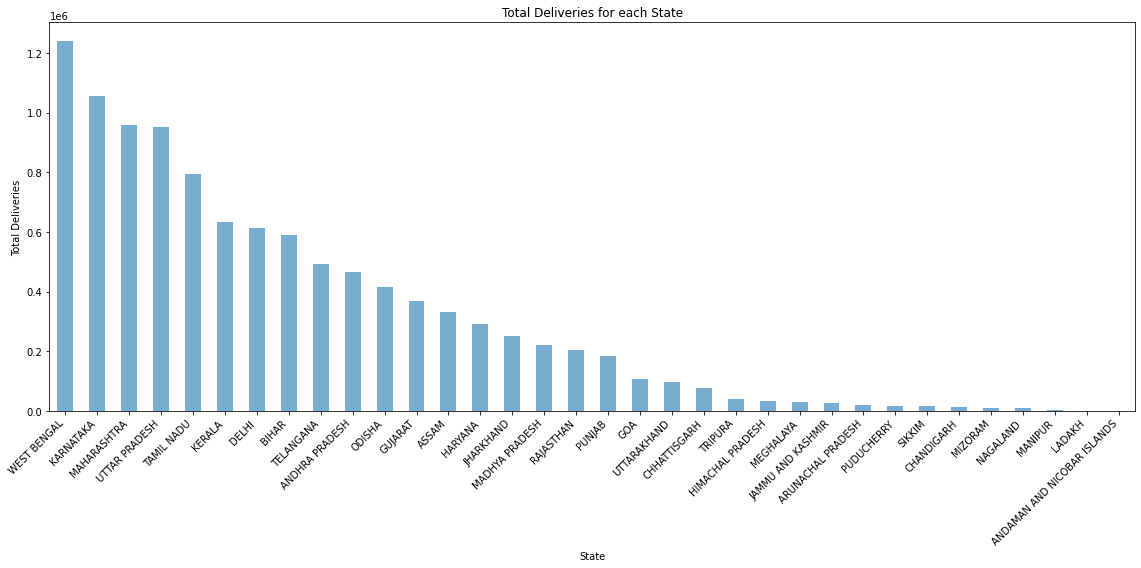

In [40]:
print("Total Deliveries for each state:")
print(state_total_deliveries_dict)

plt.figure(figsize=(16, 8))
state_total_deliveries.plot(kind='bar', color='tab:blue', alpha=0.6)
plt.xlabel('State')
plt.ylabel('Total Deliveries')
plt.title('Total Deliveries for each State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [58]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_state_heatmap(state_total_deliveries_dict, shapefile_path):
    """
    Plots a heat map on the India map showing the total deliveries per state.
    
    Args:
    state_total_deliveries_dict (dict): Dictionary with state names as keys and total deliveries as values.
    shapefile_path (str): The path to the shapefile for India.
    """
    # Convert the state total deliveries dictionary to a DataFrame
    state_counts_df = pd.DataFrame(list(state_total_deliveries_dict.items()), columns=['State', 'Total_Deliveries'])

    # Load the shapefile for India
    gdf_india = gpd.read_file(shapefile_path)
    gdf_india['State_Name'] = gdf_india['State_Name'].str.upper()

    # Convert state names to upper case
    state_counts_df['State'] = state_counts_df['State'].str.upper()
    # Correct state names to match those in the shapefile
    state_counts_df = state_counts_df.replace({
        'State': {
            'TAMIL NADU': 'TAMILNADU',
            'CHHATTISGARH': 'CHHATTISHGARH',
            'TELANGANA': 'TELENGANA',
            'ANDAMAN & NICOBAR': 'ANDAMAN AND NICOBAR',
            'JAMMU AND KASHMIR': 'JAMMU & KASHMIR',
            'DAMAN AND DIU AND DADRA AND NAGAR HAVELI': 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU'
        }
    })

    # Merge the shapefile GeoDataFrame with the deliveries counts DataFrame
    gdf_merged = gdf_india.set_index('State_Name').join(state_counts_df.set_index('State'), how='left')
    
    # Fill NaN values with 0
    gdf_merged['Total_Deliveries'] = gdf_merged['Total_Deliveries'].fillna(0)
    
    # Plot the heatmap
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    gdf_merged.plot(column='Total_Deliveries', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title('State-wise Total Deliveries Heat Map', fontdict={'fontsize': '15', 'fontweight' : '3'})
    ax.axis('off')
    plt.show()



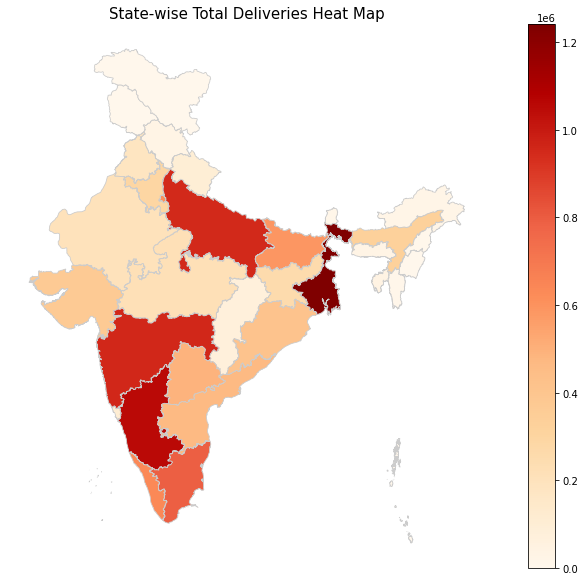

In [59]:
plot_state_heatmap(state_total_deliveries_dict, shapefile_path)

In [60]:
state_total_deliveries_dict

{'WEST BENGAL': 1240557.0,
 'KARNATAKA': 1054646.0,
 'MAHARASHTRA': 957864.0,
 'UTTAR PRADESH': 950518.0,
 'TAMIL NADU': 793898.0,
 'KERALA': 634971.0,
 'DELHI': 613859.0,
 'BIHAR': 588964.0,
 'TELANGANA': 491292.0,
 'ANDHRA PRADESH': 467427.0,
 'ODISHA': 416115.0,
 'GUJARAT': 368643.0,
 'ASSAM': 332672.0,
 'HARYANA': 292048.0,
 'JHARKHAND': 252224.0,
 'MADHYA PRADESH': 221460.0,
 'RAJASTHAN': 204438.0,
 'PUNJAB': 184102.0,
 'GOA': 107121.0,
 'UTTARAKHAND': 97420.0,
 'CHHATTISGARH': 75417.0,
 'TRIPURA': 41412.0,
 'HIMACHAL PRADESH': 33758.0,
 'MEGHALAYA': 29368.0,
 'JAMMU AND KASHMIR': 26338.0,
 'ARUNACHAL PRADESH': 19889.0,
 'PUDUCHERRY': 16510.0,
 'SIKKIM': 16231.0,
 'CHANDIGARH': 13241.0,
 'MIZORAM': 10447.0,
 'NAGALAND': 9327.0,
 'MANIPUR': 3590.0,
 'LADAKH': 0.0,
 'ANDAMAN AND NICOBAR ISLANDS': 0.0}